In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob as g
import os
import fnmatch
import datetime
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

sns.set(rc={'figure.figsize':(15,8)})
sns.set_color_codes("pastel")
sns.set(style="whitegrid", context="talk")

In [3]:
dir_path = os.path.dirname(os.path.realpath('/Users/ruianyang/Desktop/Data/original/*'))

In [4]:
file_list = []
for file in os.listdir(dir_path):
    if fnmatch.fnmatch(file, '*.tsv'):
        file_list.append(file)

In [5]:
file_list

['title.ratings.tsv',
 'title.principals.tsv',
 'title.akas.tsv',
 'name.basics.tsv',
 'title.basics.tsv',
 'title.episode.tsv',
 'title.crew.tsv']

In [6]:
file_dict = {}
for file in file_list:
    file_dict[file] = pd.read_csv(dir_path +'/'+ file, sep='\t', header=0) 

/Users/ruianyang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/ruianyang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df_movies = file_dict['title.basics.tsv'][file_dict['title.basics.tsv'].titleType == 'movie'].dropna()
df_us = file_dict['title.akas.tsv'][file_dict['title.akas.tsv'].region == 'US'].dropna()
df_name = file_dict['name.basics.tsv']
df_ratings = file_dict['title.ratings.tsv']
df_director = pd.read_csv("/Users/ruianyang/Documents/GradSchool/MSDS/DATA557/final_project/Nominated_directors.csv")

In [10]:
df_movies = df_movies[df_movies.tconst.isin(df_us['titleId'].values.tolist())]

df_movies = df_movies[df_movies.startYear != '\\N']
df_movies = df_movies[df_movies.startYear != '2115']
df_movies = df_movies[df_movies.genres != '\\N']
df_movies = df_movies[df_movies.runtimeMinutes != '\\N']

df_movies['startYear'] = df_movies['startYear'].apply(pd.to_numeric)
df_movies['runtimeMinutes'] = df_movies['runtimeMinutes'].apply(pd.to_numeric)
df_movies = df_movies[df_movies.runtimeMinutes < 50000]

decade_list = (df_movies.startYear//10)*10
df_movies['decade'] = decade_list
df_movies = df_movies.join(df_movies['genres'].str.split(',', expand=True).add_prefix('genre_'))

df_movies = df_movies[~df_movies['genre_0'].isin(['Musical', 'Music','Short','Sport','Family','Film-Noir',
                                                  'Adult','News', 'Talk-Show', 
                                                  'Reality-TV', 'Game-Show'])]

df_movies['genre_0'] = df_movies['genre_0'].replace(to_replace =["Sci-Fi", "Fantasy"],  value ="Fantasy/Sci-Fi") 
df_movies['genre_0'] = df_movies['genre_0'].replace(to_replace =["Horror", "Thriller",'Mystery'],  value ="Horror/Thriller")
df_movies['genre_0'] = df_movies['genre_0'].replace(to_replace = "Musical",  value ="Music") 
df_movies['genre_0'] = df_movies['genre_0'].replace(to_replace =["Adventure", 'Action'],  value ="Action") 
df_movies['genre_0'] = df_movies['genre_0'].replace(to_replace =["Crime", 'War'],  value ="War/Crime") 
df_movies['genre_0'] = df_movies['genre_0'].replace(to_replace =["Biography", 'Documentary'],  value ="Documentary") 

In [23]:
df_crew = file_dict['title.crew.tsv']

df_crew = df_crew[df_crew.tconst.isin(df_movies['tconst'].values.tolist())]
df_crew = df_crew.join(df_crew['directors'].str.split(',', expand=True)
                       .add_prefix('director_')).drop(columns=['writers'],axis=1)
df_crew = df_crew[df_crew.columns[[0,1,2]]]


,tconst,directors,director_0
8,tt0000009,nm0085156,nm0085156
145,tt0000147,nm0714557,nm0714557
673,tt0000679,"nm0877783,nm0091767",nm0877783
1274,tt0001285,nm0085865,nm0085865
1486,tt0001498,nm0205986,nm0205986
1873,tt0001892,nm0300487,nm0300487
1892,tt0001911,nm0519315,nm0519315
1942,tt0001964,nm0300487,nm0300487
2077,tt0002101,nm0309130,nm0309130
2106,tt0002130,"nm0655824,nm0078205,nm0209738",nm0655824


In [54]:
df_crew_name = pd.merge(df_crew,df_name,left_on='director_0', right_on = 'nconst',how='left')
df_crew_name = df_crew_name[df_crew_name.columns[[0,3,4]]]
df_nom_director = pd.merge(df_crew_name,df_director,left_on='primaryName', right_on='nominated director',how='left').drop(columns=['nominated director'],axis=1)
df_nom_director = df_nom_director.fillna(0)

In [61]:
df_movie_director = pd.merge(df_movies,df_nom_director,on='tconst',how='left')
df_merge = df_movie_director.merge(df_ratings, on='tconst')

In [101]:
df_merge.to_csv(dir_path +'/us_movies_with_director_info.csv')

Text(0.5, 1.0, 'Movie Genre Popularity')

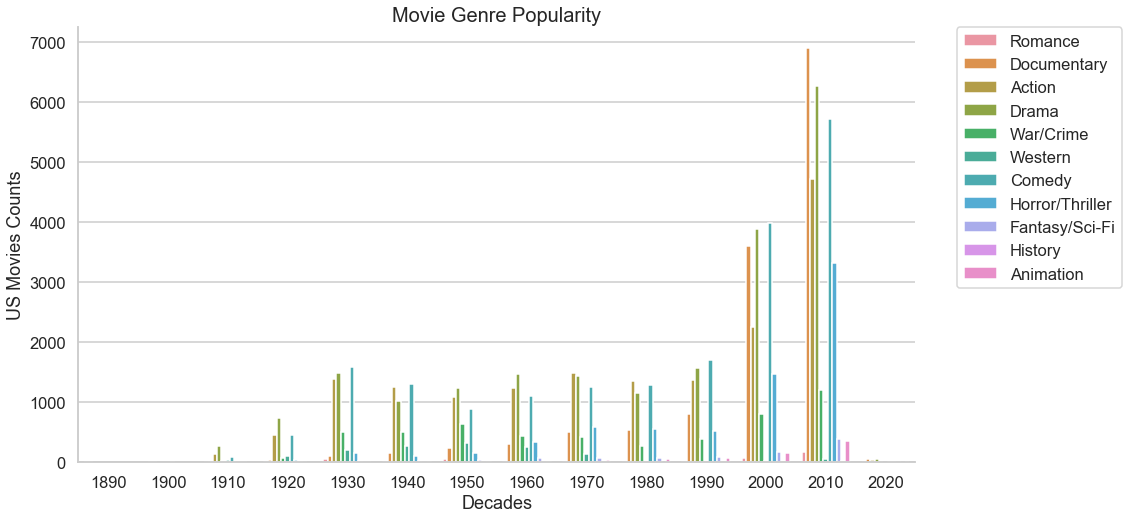

In [62]:
ax = sns.countplot(x='decade', data = df_merge,hue='genre_0')
ax.set(ylabel="US Movies Counts",xlabel="Decade")
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Movie Genre Popularity', fontsize = 20)

Text(0.5, 1.0, 'Movie Runtime')

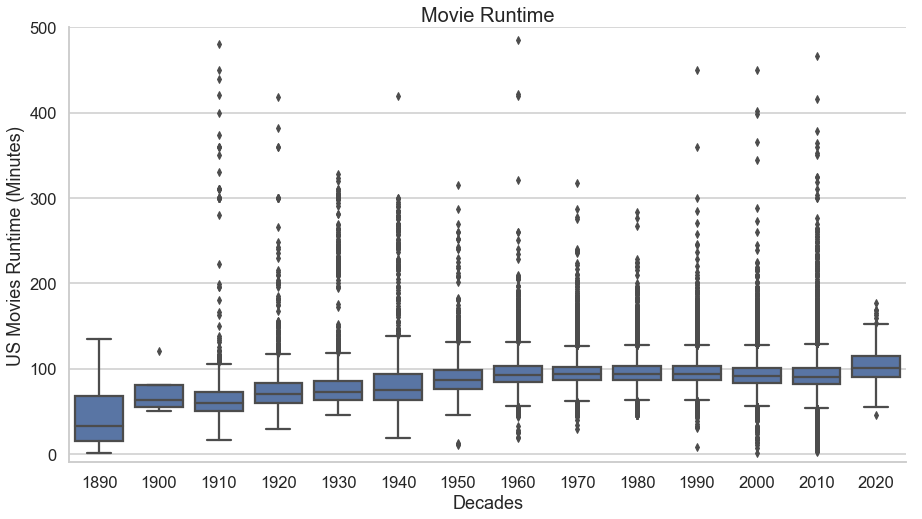

In [63]:
ax = sns.boxplot(x="decade", y="runtimeMinutes", data=df_merge,color='b')
ax.set(ylabel="US Movies Runtime (Minutes)",xlabel="Decade")
sns.despine()
plt.ylim(-10,500)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Movie Runtime', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Runtime')

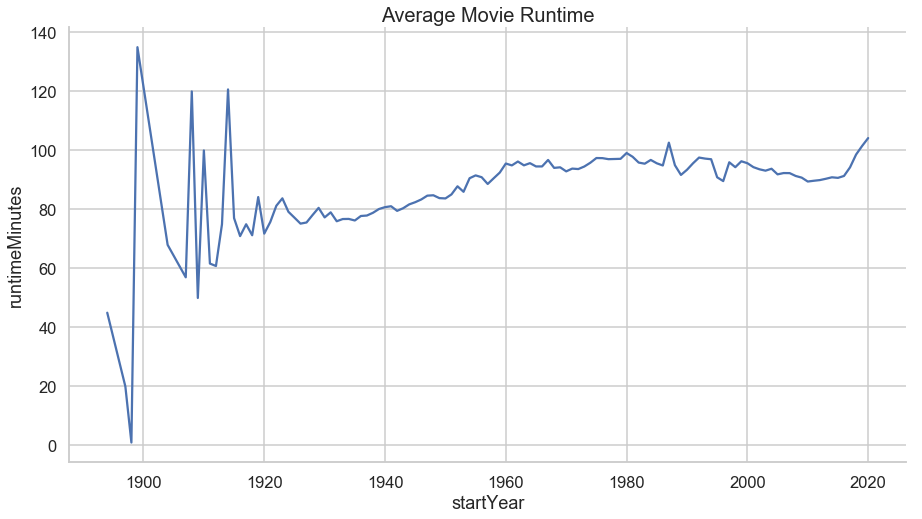

In [94]:
sns.lineplot(x='startYear', y='runtimeMinutes', 
             data=df_merge.pivot_table('runtimeMinutes', 'startYear', aggfunc='mean').reset_index())
ax.set(ylabel="Average US Movies Runtime (Minutes)",xlabel="Year")
sns.despine()
plt.title('Average Movie Runtime', fontsize = 20)

Text(0.5, 1.0, 'Movie Ratings')

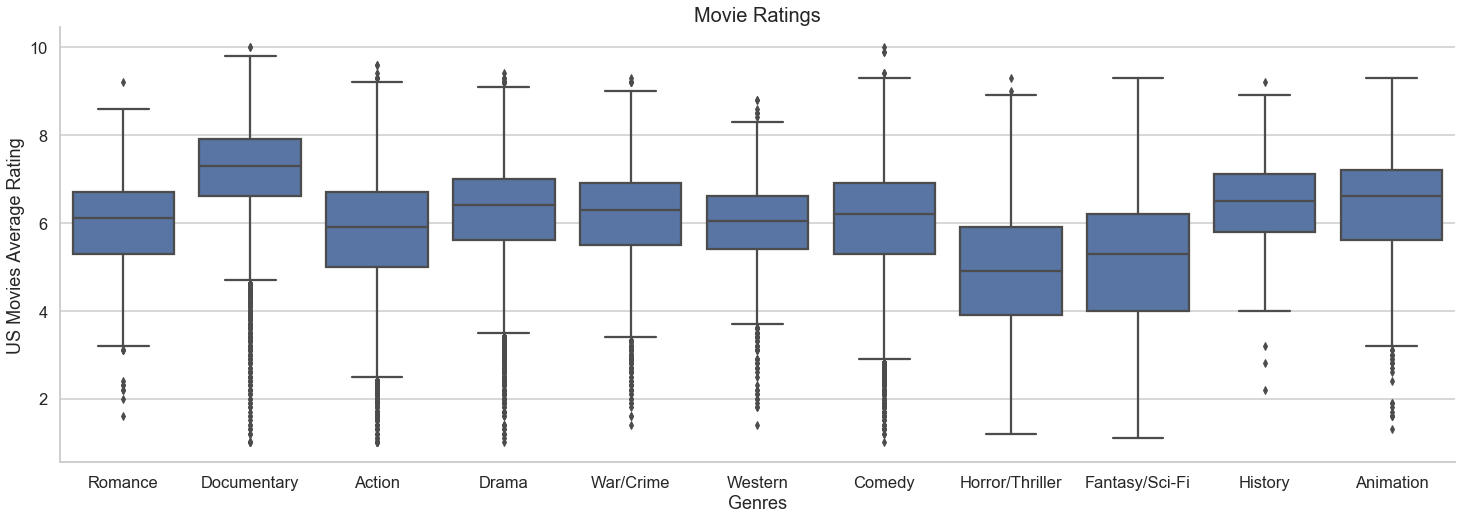

In [100]:
sns.set(rc={'figure.figsize':(25,8)})
sns.set(style="whitegrid", context="talk")
ax = sns.boxplot(x="genre_0", y="averageRating", data=df_merge,color='b')
ax.set(ylabel="US Movies Average Rating",xlabel="Genres")
sns.despine()
#plt.ylim(-10,500)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Movie Ratings', fontsize = 20)

Text(0.5, 1.0, 'Movie Ratings')

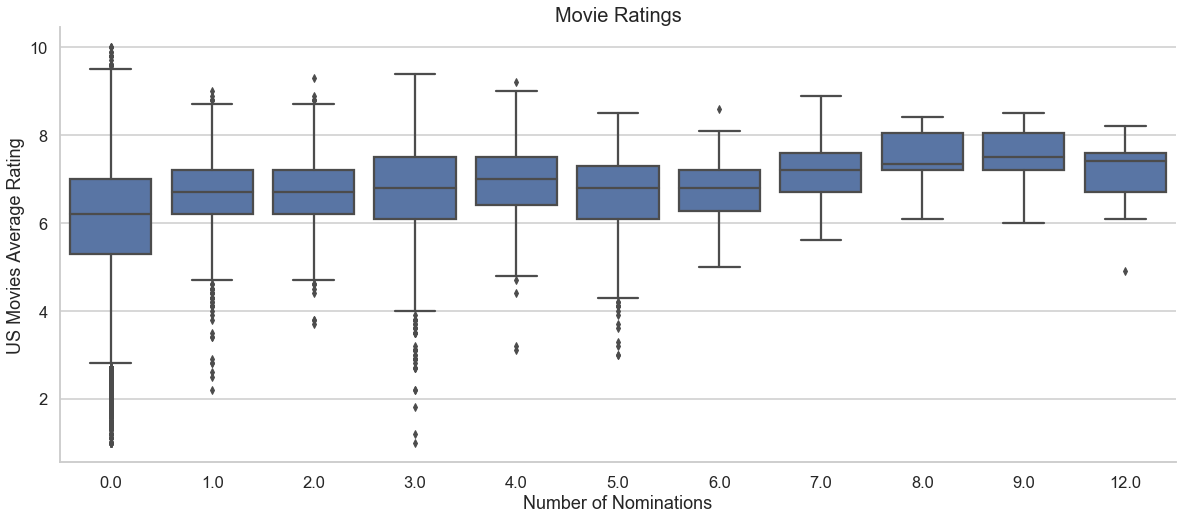

In [98]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set(style="whitegrid", context="talk")
ax = sns.boxplot(x="nominations", y="averageRating", data=df_merge,color='b')
ax.set(ylabel="US Movies Average Rating",xlabel="Number of Nominations")
sns.despine()
#plt.ylim(-10,500)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Movie Ratings', fontsize = 20)

Text(0.5, 1.0, 'Average IMDb Rating by Genre')

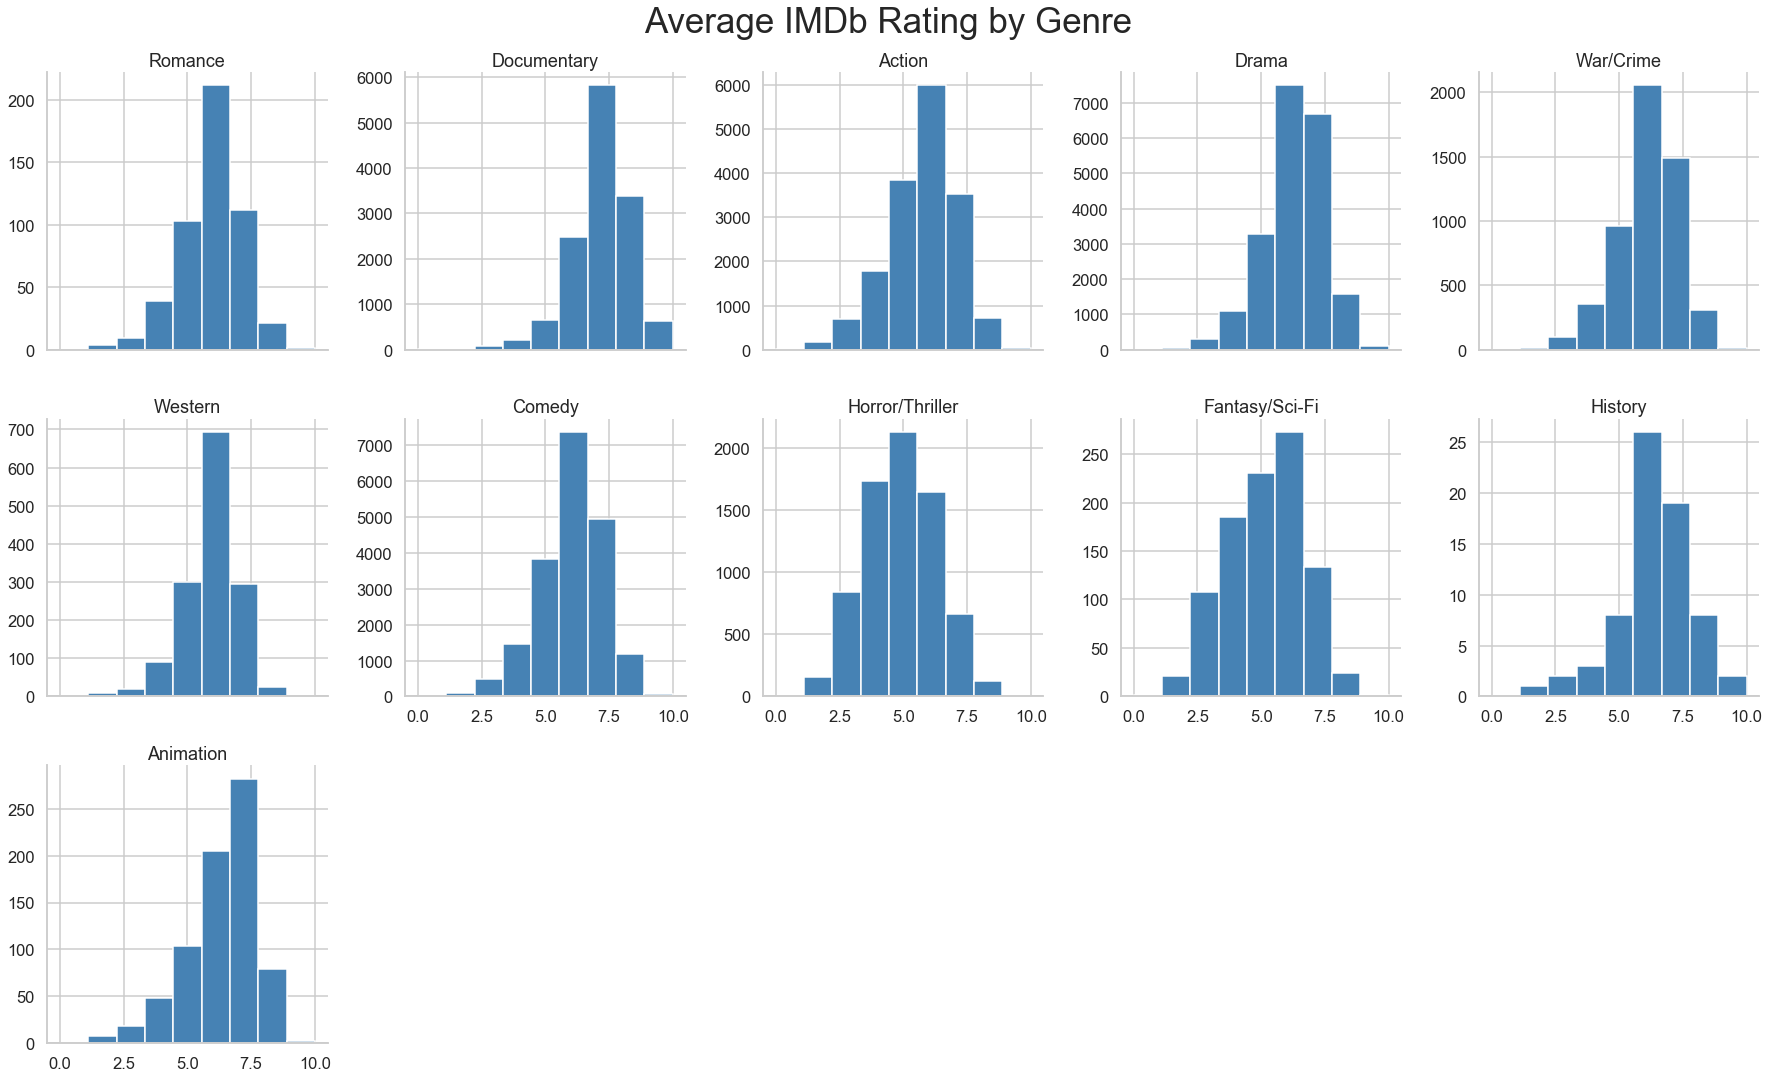

In [142]:
# Check for normality
kws = dict(linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_merge, col="genre_0", col_wrap=5, margin_titles=True, sharey=False, height=5, aspect=1)
bins = np.linspace(0, 10, 10)
g.map(plt.hist, "averageRating", color="steelblue", bins=bins).set_titles("{col_name}")

g.set_axis_labels('', '')
g.fig.text(x=0.5, y=1.0, 
           horizontalalignment='center', 
           s='Average IMDb Rating by Genre', 
           size=35)

Text(0.5, 1.0, 'Average IMDb Rating by Oscar Nomination')

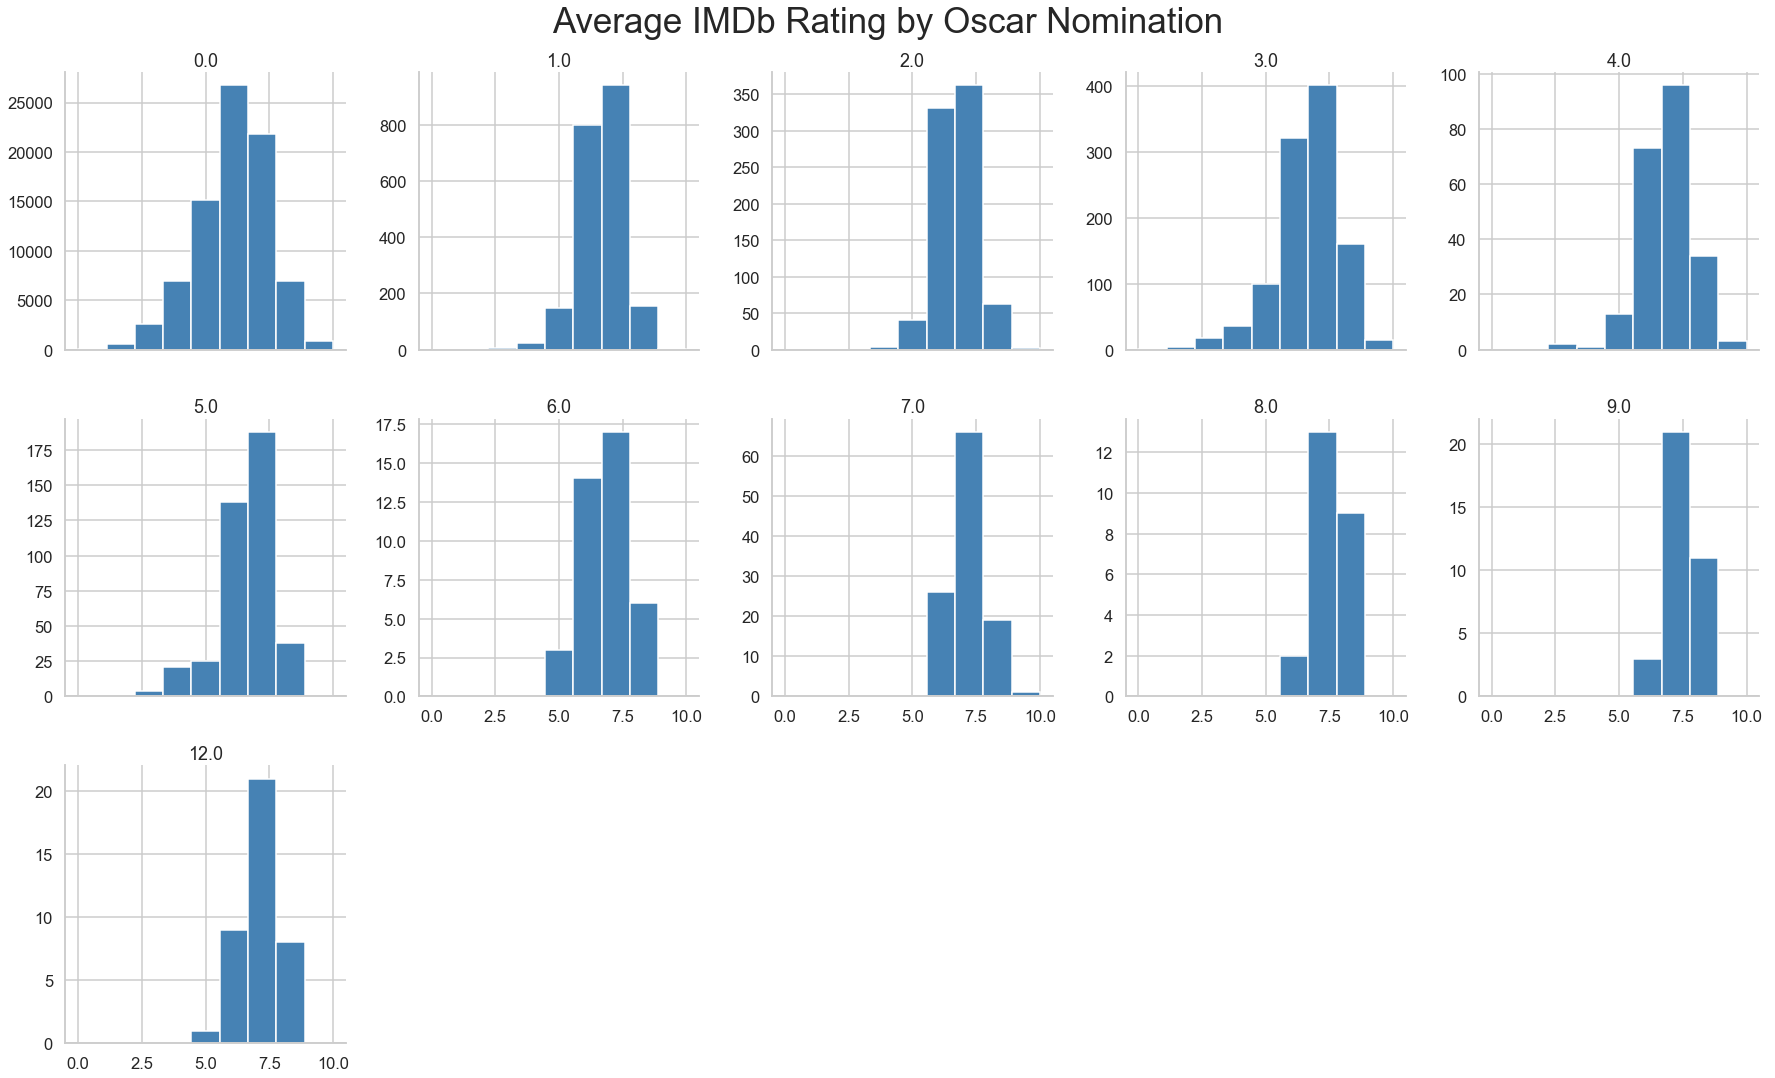

In [143]:
# Check for normality
kws = dict(linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_merge, col="nominations", col_wrap=5, margin_titles=True, sharey=False, height=5, aspect=1)
bins = np.linspace(0, 10, 10)
g.map(plt.hist, "averageRating", color="steelblue", bins=bins).set_titles("{col_name}")

g.set_axis_labels('', '')
g.fig.text(x=0.5, y=1.0, 
           horizontalalignment='center', 
           s='Average IMDb Rating by Oscar Nomination', 
           size=35)

In [146]:
# One-way ANOVA
f, p = stats.f_oneway(*[list(df_merge[df_merge['genre_0']==genre].averageRating) for genre in set(df_merge['genre_0'])])
f,p

(1984.028026864998, 0.0)

In [147]:
# One-way ANOVA
f, p = stats.f_oneway(*[list(df_merge[df_merge['nominations']==num].averageRating) for num in set(df_merge['nominations'])])
f,p

(98.1215148072781, 3.1570976976158456e-203)